In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nn import NeuralNetwork
from utils.normalizador import Normalizador
from utils.spliter import Splitter
from sklearn.metrics import confusion_matrix, accuracy_score

# Definir a seed para reprodutibilidade
SEED = 44
np.random.seed(SEED)

In [2]:
# Ler o dataset e definir os nomes das colunas
dataset = pd.read_excel("dadosmamografia.xlsx")
colunas = ['x1', 'x2', 'x3', 'x4', 'x5', 'y']
dataset.columns = colunas

# Criar uma instância da classe Normalizador
normalizador = Normalizador()

# Normalizar os dados
dataset_normalizado = normalizador.normaliza(dataset.values)
dataset_normalizado = pd.DataFrame(dataset_normalizado, columns=colunas)

# Separar o dataset (60% treino, 20% teste, 20% validação)
splitter = Splitter(dataset_normalizado)
treino, teste, validacao = splitter.split_data(0.6, 0.2, 0.2)

# Separar as entradas (X) e saídas (y) do conjunto de treino, teste e validação
X_treino = treino[['x1', 'x2', 'x3', 'x4', 'x5']].values
y_treino = treino[['y']].values

X_validacao = validacao[['x1', 'x2', 'x3', 'x4', 'x5']].values
y_validacao = validacao[['y']].values

X_teste = teste[['x1', 'x2', 'x3', 'x4', 'x5']].values
y_teste = teste[['y']].values

In [6]:
import time
import pandas as pd

def grid_search(neuronios_list, ativacoes_list, taxas_aprendizado_list, X_treino, y_treino, X_validacao, y_validacao, X_teste, y_teste):
    resultados = []

    for neuronios in neuronios_list:
        for ativacao in ativacoes_list:
            for taxa_aprendizagem in taxas_aprendizado_list:
                print(f"Treinando com {neuronios} neurônios, ativação {ativacao}, e taxa de aprendizado {taxa_aprendizagem}...")

                # Criar o modelo com duas camadas escondidas e a função de ativação
                modelo = NeuralNetwork(
                    n_entradas=5,
                    n_saidas=1,
                    n_neuronios_escondidos=neuronios,
                    func_ativacao=ativacao,
                    seed=SEED
                )

                # Medir o tempo de treinamento
                inicio_tempo = time.time()

                # Treinar o modelo
                modelo.treinar(X_treino, y_treino, X_validacao, y_validacao, epochs=1000, taxa_aprendizagem=taxa_aprendizagem, verbose='n')

                fim_tempo = time.time()
                tempo_treino = fim_tempo - inicio_tempo

                # Calcular o MSE e acurácia no conjunto de validação
                mse_validacao = modelo.calcular_mse(X_validacao, y_validacao)
                acuracia_validacao = modelo.calcular_acuracia(X_validacao, y_validacao)

                # Calcular o MSE e acurácia no conjunto de teste
                mse_teste = modelo.calcular_mse(X_teste, y_teste)
                acuracia_teste = modelo.calcular_acuracia(X_teste, y_teste)

                # Armazenar os resultados
                resultados.append({
                    'neuronios': neuronios,
                    'ativacao': ativacao,
                    'taxa_aprendizagem': taxa_aprendizagem,
                    'mse_validacao': mse_validacao,
                    'acuracia_validacao': acuracia_validacao,
                    'mse_teste': mse_teste,
                    'acuracia_teste': acuracia_teste,
                    'tempo_treino': tempo_treino
                })
                print(f"Finalizado, tempo de treino: {round(tempo_treino, 2)} segundos")
                print(f"MSE Teste: {round(mse_teste,2)}, Acurácia Teste: {round(acuracia_teste,2)}")
                print(f"MSE Validação: {round(mse_validacao,2)}, Acurácia Validação: {round(acuracia_validacao,2)}")
                print(" ")

    return pd.DataFrame(resultados)

In [7]:
# Definir os hiperparâmetros
neuronios_list = [16, 32, 64]
ativacoes_list = ['sigmoid', 'relu', 'linear', 'tanh']
taxas_aprendizado_list = [0.01]

resultados = grid_search(neuronios_list, ativacoes_list, taxas_aprendizado_list, X_treino, y_treino, X_validacao, y_validacao, X_teste, y_teste)

Treinando com 16 neurônios, ativação sigmoid, e taxa de aprendizado 0.01...
Finalizado, tempo de treino: 7.94 segundos
MSE Teste: 0.13, Acurácia Teste: 0.84
MSE Validação: 0.13, Acurácia Validação: 0.8
 
Treinando com 16 neurônios, ativação relu, e taxa de aprendizado 0.01...
Finalizado, tempo de treino: 0.49 segundos
MSE Teste: 0.13, Acurácia Teste: 0.81
MSE Validação: 0.14, Acurácia Validação: 0.81
 
Treinando com 16 neurônios, ativação linear, e taxa de aprendizado 0.01...
Finalizado, tempo de treino: 0.08 segundos
MSE Teste: 0.13, Acurácia Teste: 0.81
MSE Validação: 0.14, Acurácia Validação: 0.8
 
Treinando com 16 neurônios, ativação tanh, e taxa de aprendizado 0.01...
Finalizado, tempo de treino: 0.09 segundos
MSE Teste: 0.14, Acurácia Teste: 0.8
MSE Validação: 0.15, Acurácia Validação: 0.8
 
Treinando com 32 neurônios, ativação sigmoid, e taxa de aprendizado 0.01...
Finalizado, tempo de treino: 17.31 segundos
MSE Teste: 0.13, Acurácia Teste: 0.84
MSE Validação: 0.13, Acurácia Val

In [9]:
resultados

,neuronios,ativacao,taxa_aprendizagem,mse_validacao,acuracia_validacao,mse_teste,acuracia_teste,tempo_treino
0,16,sigmoid,0.01,0.132392,0.797619,0.133520,0.837349,7.944218
1,16,relu,0.01,0.142945,0.809524,0.133254,0.807229,0.493269
2,16,linear,0.01,0.141723,0.803571,0.134472,0.807229,0.077055
3,16,tanh,0.01,0.146573,0.797619,0.136483,0.801205,0.085661
4,32,sigmoid,0.01,0.133378,0.803571,0.132502,0.837349,17.306570
5,32,relu,0.01,0.148584,0.773810,0.135560,0.813253,0.346076
6,32,linear,0.01,0.138158,0.809524,0.134278,0.807229,0.198215
7,32,tanh,0.01,0.146213,0.797619,0.134001,0.801205,0.502699
8,64,sigmoid,0.01,0.131817,0.803571,0.132125,0.819277,6.579443
9,64,relu,0.01,0.147969,0.803571,0.133514,0.801205,0.275874


In [21]:
# Encontre a linha com o menor MSE de validação
melhor_resultado_mse = resultados.loc[resultados['mse_validacao'].idxmin()]
melhor_resultado_acc = resultados.loc[resultados['acuracia_validacao'].idxmax()]
# Exibe o melhor resultado
print("Melhor configuração para MSE:")
print(melhor_resultado_mse)
print("####################################")
print("Melhor configuração para Acurácoa:")
print(melhor_resultado_acc)

Melhor configuração para MSE:
neuronios                   64
ativacao               sigmoid
taxa_aprendizagem         0.01
mse_validacao         0.131817
acuracia_validacao    0.803571
mse_teste             0.132125
acuracia_teste        0.819277
tempo_treino          6.513239
Name: 8, dtype: object
####################################
Melhor configuração para Acurácoa:
neuronios                   16
ativacao                  relu
taxa_aprendizagem         0.01
mse_validacao         0.142945
acuracia_validacao    0.809524
mse_teste             0.133254
acuracia_teste        0.807229
tempo_treino          0.490134
Name: 1, dtype: object


In [17]:
resultados

,neuronios,ativacao,taxa_aprendizagem,mse_validacao,acuracia_validacao,mse_teste,acuracia_teste,tempo_treino
0,16,sigmoid,0.01,0.132392,0.797619,0.133520,0.837349,8.026097
1,16,relu,0.01,0.142945,0.809524,0.133254,0.807229,0.490134
2,16,linear,0.01,0.141723,0.803571,0.134472,0.807229,0.074852
3,16,tanh,0.01,0.146573,0.797619,0.136483,0.801205,0.084276
4,32,sigmoid,0.01,0.133378,0.803571,0.132502,0.837349,8.530681
5,32,relu,0.01,0.148584,0.773810,0.135560,0.813253,0.346883
6,32,linear,0.01,0.138158,0.809524,0.134278,0.807229,0.196355
7,32,tanh,0.01,0.146213,0.797619,0.134001,0.801205,0.490390
8,64,sigmoid,0.01,0.131817,0.803571,0.132125,0.819277,6.513239
9,64,relu,0.01,0.147969,0.803571,0.133514,0.801205,0.288582


In [19]:
# # Plotar o tempo de treinamento
# plt.figure(figsize=(10, 6))
# sns.barplot(x='neuronios', y='tempo_treino', hue='ativacao', data=resultados)
# plt.title('Tempo de Treinamento por Nº de Neurônios e Função de Ativação')
# plt.xlabel('Número de Neurônios')
# plt.ylabel('Tempo de Treinamento (segundos)')
# plt.show()

In [3]:
# best_model = NeuralNetwork(n_entradas=5, n_saidas=1, n_neuronios_escondidos=64, func_ativacao='sigmoid',seed=SEED)

best_model = NeuralNetwork(n_entradas=5, n_saidas=1, n_neuronios_escondidos=16, func_ativacao='relu',seed=SEED)# Treinar o modelo (com validação cruzada e parada antecipada)
best_model.treinar(X_treino, y_treino, X_validacao, y_validacao, epochs=1000, taxa_aprendizagem=0.01,verbose='n')

print()
# best_model.mostrar_pesos('Fim')

# Fazer previsões no conjunto de teste
previsoes_teste = best_model.prever(X_teste)

# Transformar as previsões em binárias (0 ou 1)
previsoes_binarias = np.where(previsoes_teste >= 0.5, 1, 0)

# Calcular a acurácia no conjunto de teste
acuracia = np.mean(previsoes_binarias == y_teste)
print(f"Acurácia no conjunto de teste: {acuracia:.6f}")

# Plotar a matriz de confusão
# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, previsoes_binarias)
print(matriz_confusao)


Acurácia no conjunto de teste: 0.807229
[[55 19]
 [13 79]]


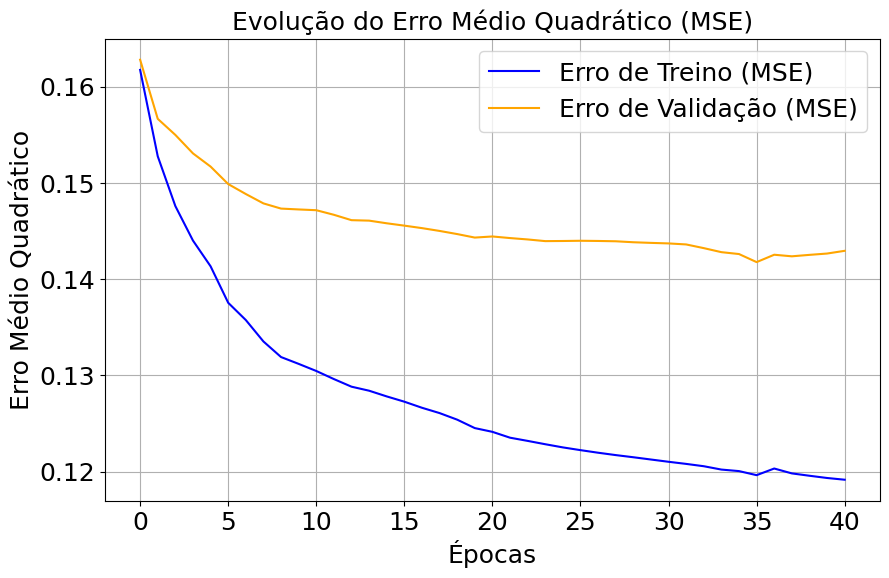

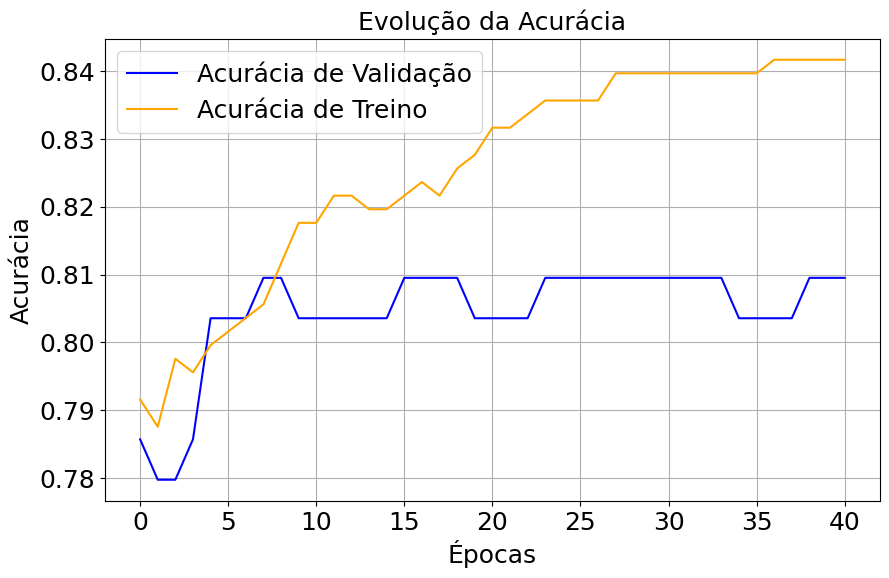

In [4]:
best_model.plotar_resultados()

Acurácia no conjunto de teste: 0.807229


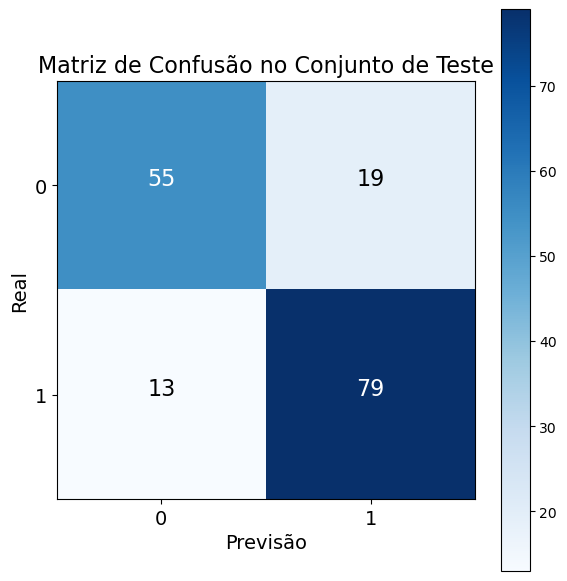

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score

previsoes_teste = best_model.prever(X_teste)
previsoes_binarias = np.where(previsoes_teste >= 0.5, 1, 0)

# Calcular a acurácia no conjunto de teste
acuracia_teste = accuracy_score(y_teste, previsoes_binarias)
print(f"Acurácia no conjunto de teste: {acuracia_teste:.6f}")

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, previsoes_binarias)

# Plotar a matriz de confusão usando matplotlib com fonte maior
plt.figure(figsize=(6, 6))
plt.imshow(matriz_confusao, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão no Conjunto de Teste', fontsize=16)
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], fontsize=14)
plt.yticks(tick_marks, ['0', '1'], fontsize=14)

# Rótulos dos eixos com fonte maior
plt.xlabel('Previsão', fontsize=14)
plt.ylabel('Real', fontsize=14)

# Adicionar os valores na matriz com fonte maior
thresh = matriz_confusao.max() / 2.
for i, j in np.ndindex(matriz_confusao.shape):
    plt.text(j, i, f'{matriz_confusao[i, j]}',
             horizontalalignment="center",
             fontsize=16,
             color="white" if matriz_confusao[i, j] > thresh else "black")

plt.tight_layout()
plt.show()
